In [287]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go

In [288]:
df = pd.read_csv("/content/sales_data_sample.csv",encoding='ISO-8859-1')

In [289]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [291]:
df.shape

(2823, 25)

# null value check

In [292]:
df.isnull().any()

ORDERNUMBER         False
QUANTITYORDERED     False
PRICEEACH           False
ORDERLINENUMBER     False
SALES               False
ORDERDATE           False
STATUS              False
QTR_ID              False
MONTH_ID            False
YEAR_ID             False
PRODUCTLINE         False
MSRP                False
PRODUCTCODE         False
CUSTOMERNAME        False
PHONE               False
ADDRESSLINE1        False
ADDRESSLINE2         True
CITY                False
STATE                True
POSTALCODE           True
COUNTRY             False
TERRITORY            True
CONTACTLASTNAME     False
CONTACTFIRSTNAME    False
DEALSIZE            False
dtype: bool

In [293]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [294]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [295]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.0,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.9,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small


In [296]:
df['ADDRESSLINE2']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2818    NaN
2819    NaN
2820    NaN
2821    NaN
2822    NaN
Name: ADDRESSLINE2, Length: 2823, dtype: object

Finding the best method to handle missing values and bring them nearest to their actual values involves understanding the nature of your data and the context in which the missing values occur. Here's a systematic approach to determine the most suitable method:

Steps to Determine the Handling Method:
Understand the Data and Missingness Patterns:

Data Type: Identify if the missing values are in numerical or categorical columns.
Pattern: Determine if missing values occur randomly or systematically (e.g., in specific groups or at random).
Data Exploration:

Summary Statistics: Calculate descriptive statistics to understand the distribution of your data and missing values in each column.
Visualization: Use histograms, box plots, or bar charts to visualize the distribution of your data and identify any patterns related to missing values.
Choose Handling Methods:

Numerical Data:
Mean/Median Imputation: Use the mean or median to fill missing values if data is numeric and normally distributed.
Linear Interpolation: Use linear interpolation to estimate missing values based on neighboring values, suitable for ordered data.
Regression Imputation: Predict missing values using a regression model based on other variables if relationships are clear.
K-Nearest Neighbors (KNN) Imputation: Use KNN to find nearest neighbors and impute based on their values if data points are similar.
Categorical Data:
Mode Imputation: Fill missing values with the most frequent category

In [297]:
!pip install missingno

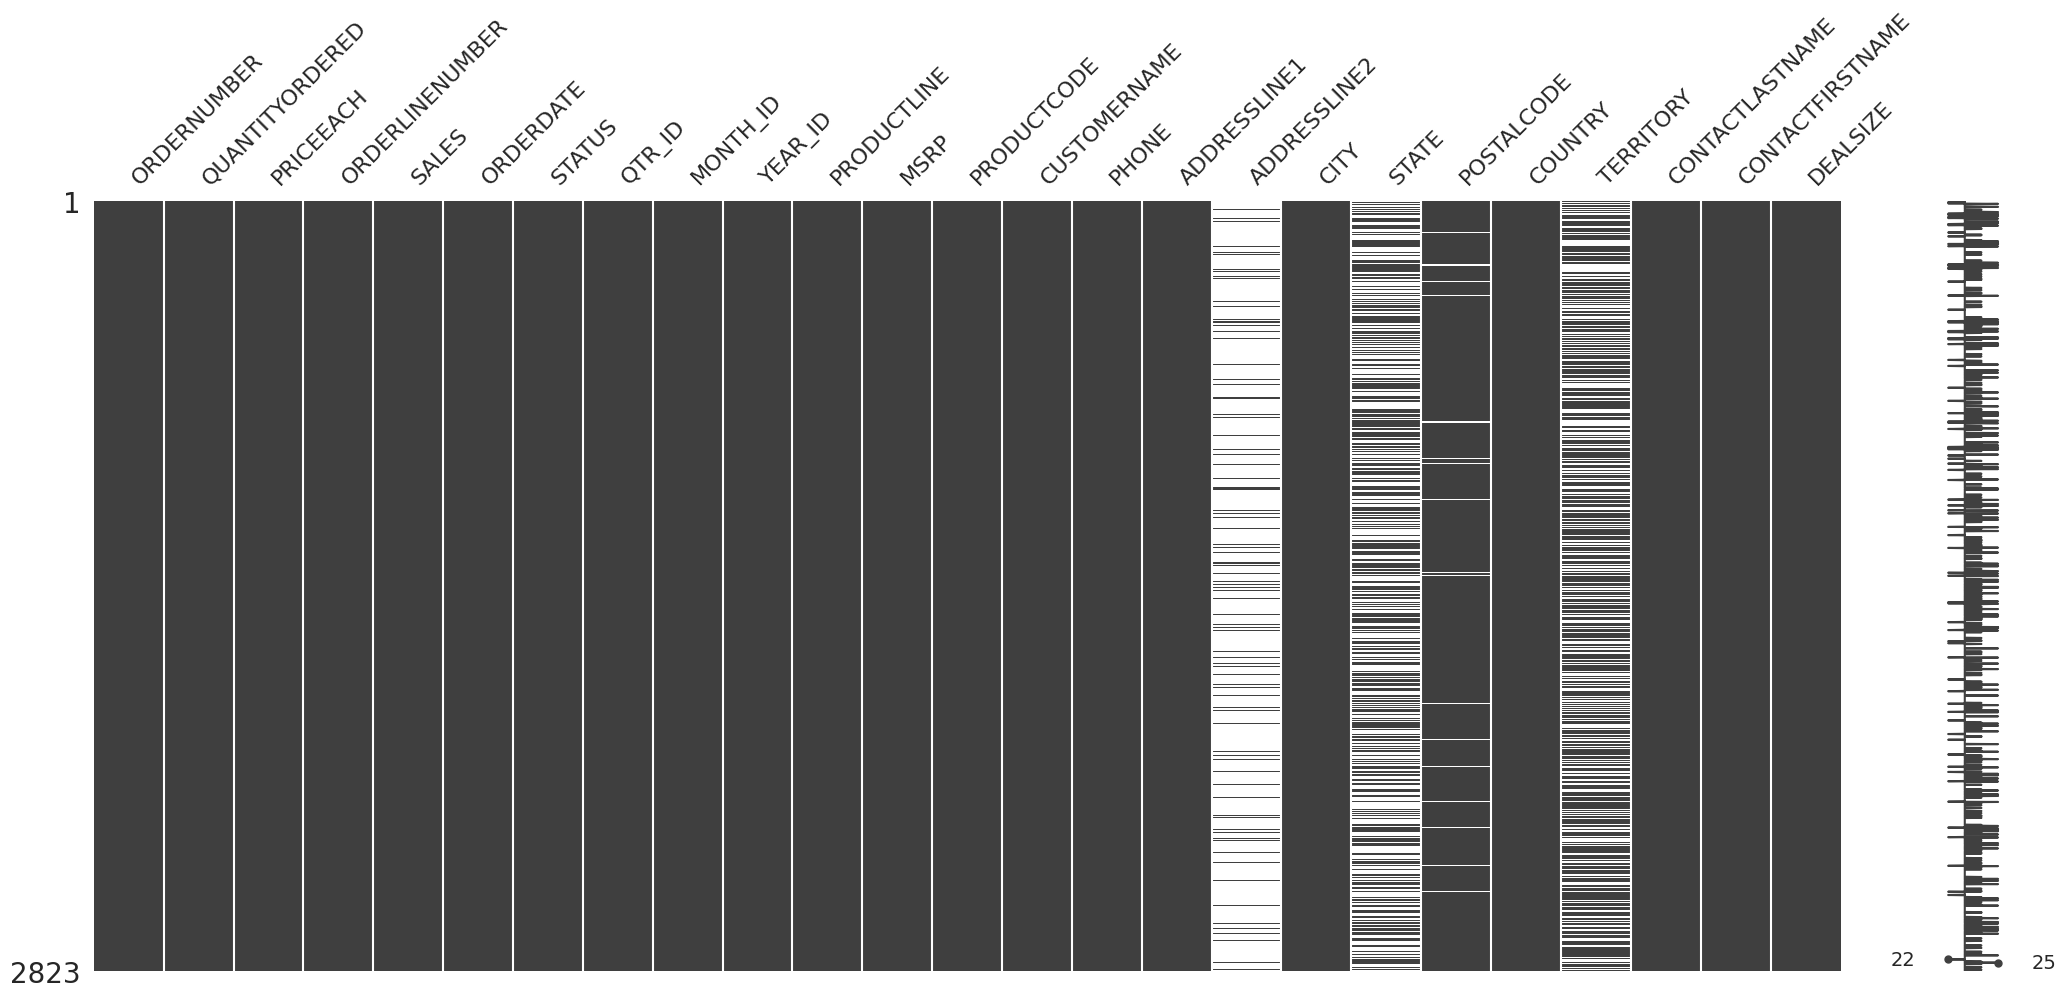

In [298]:
import missingno as msno
msno.matrix(df)
plt.show()

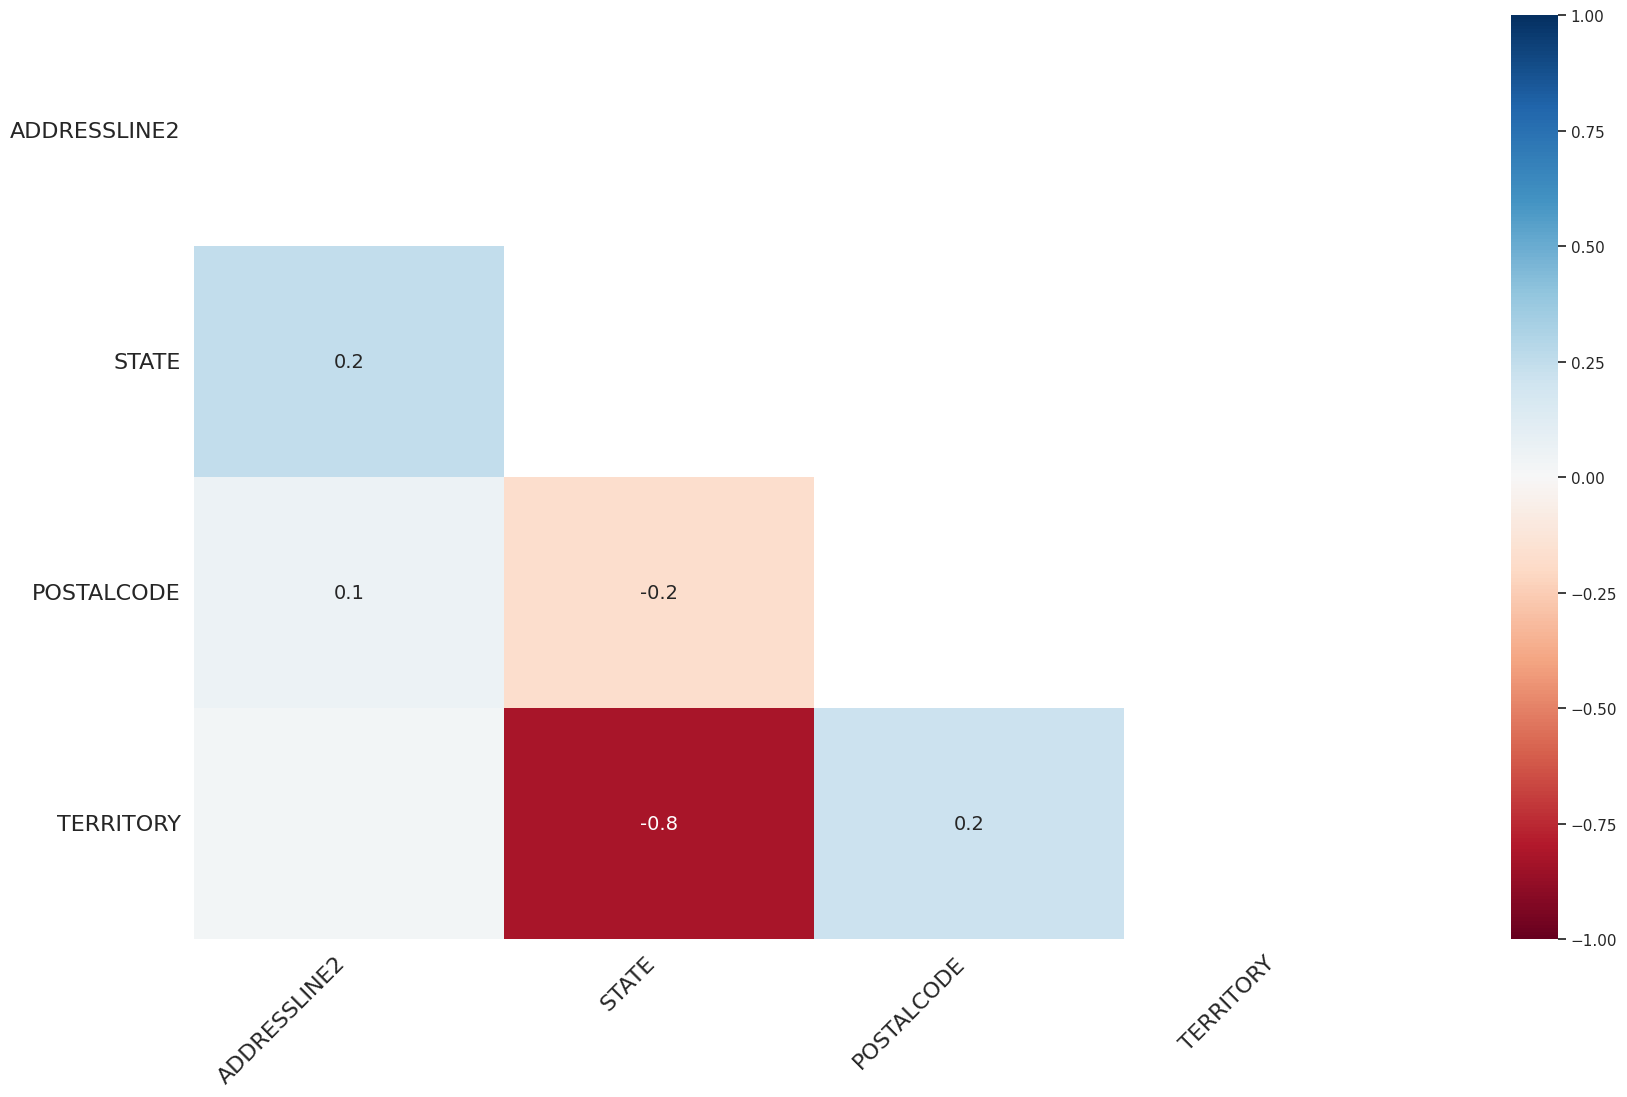

In [299]:
msno.heatmap(df)
plt.show()

A heatmap can show the correlation of missing values between different columns.

# BAR  CHART

---



Missing Value Bar Chart
A bar chart shows the count of missing values in each column.

<Axes: >

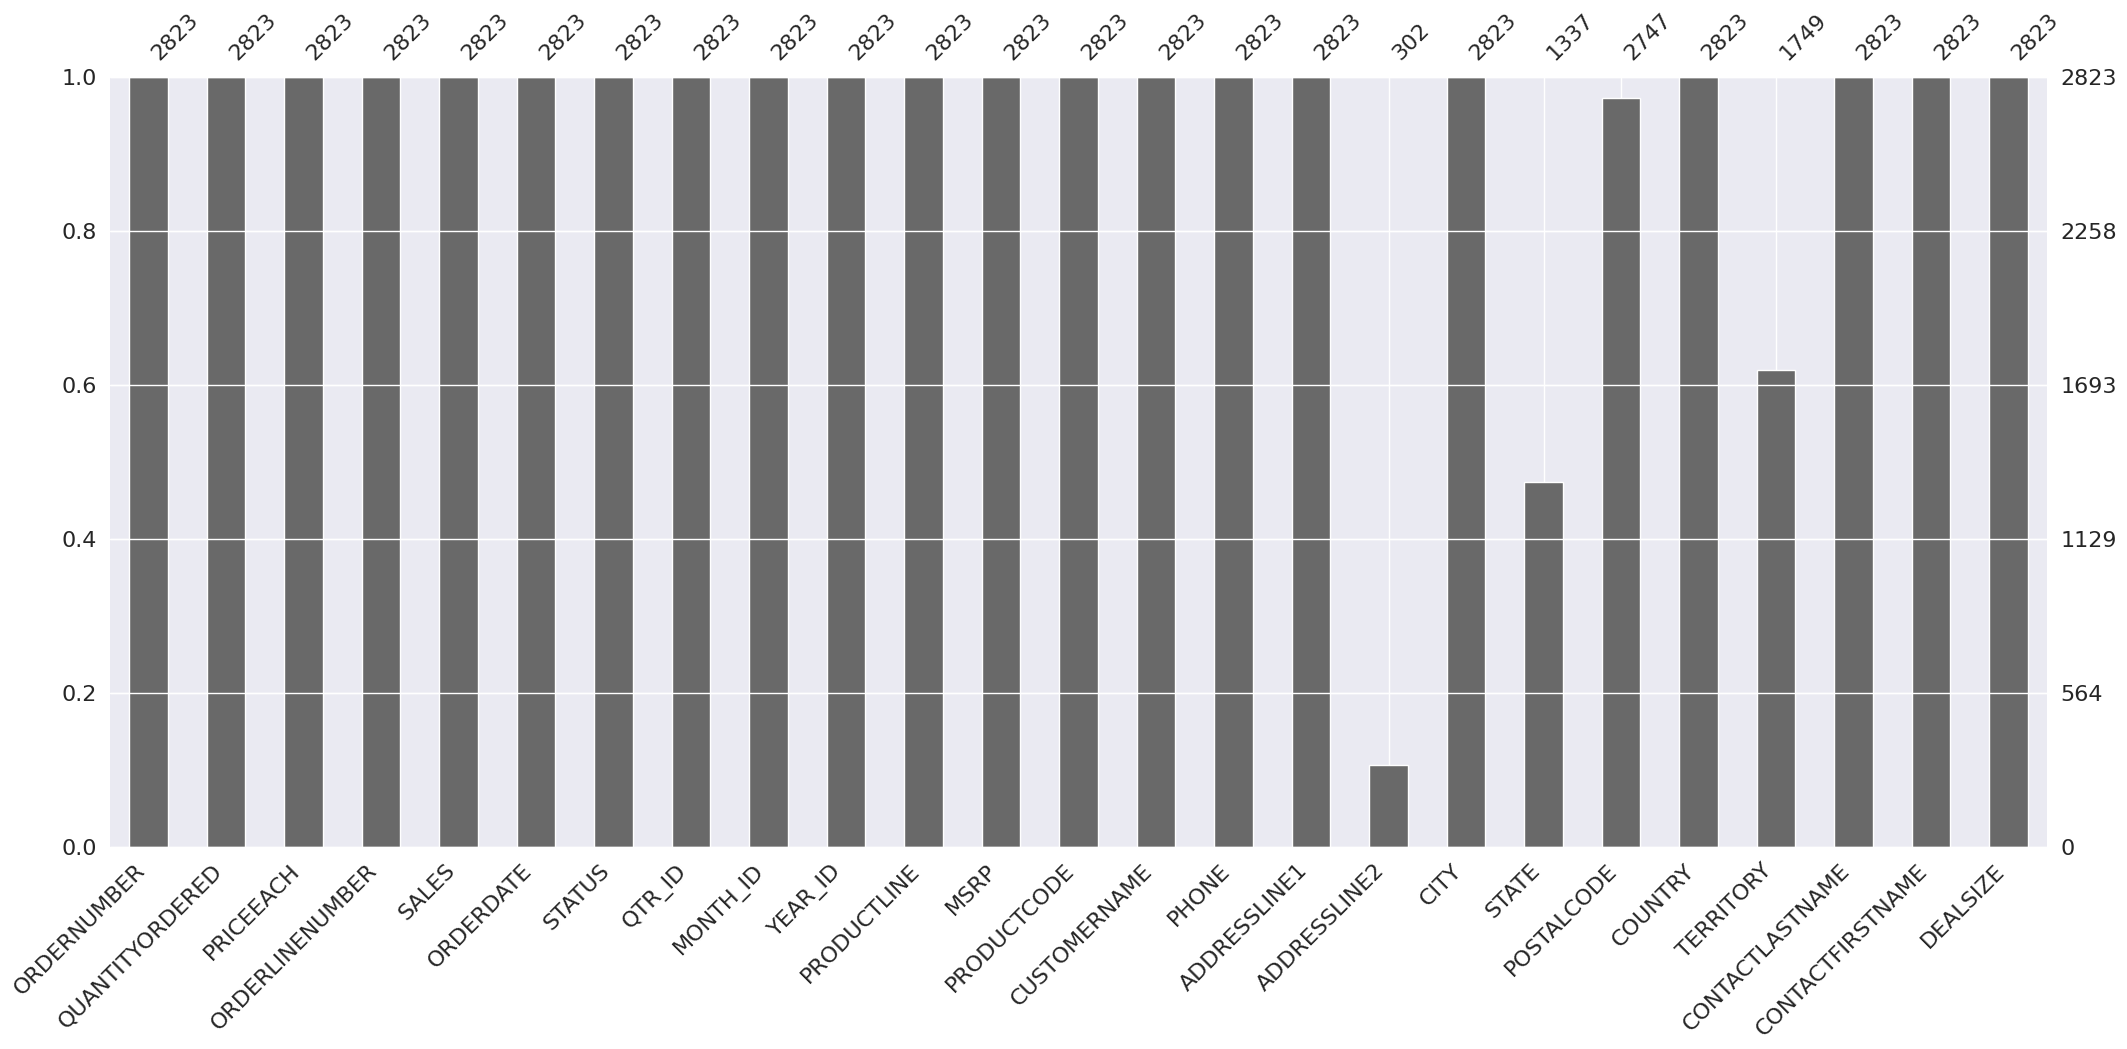

In [300]:
msno.bar(df)

# Missing Value Dendrogram

---



A dendrogram shows a hierarchical clustering of columns based on the similarity of their missing value patterns.

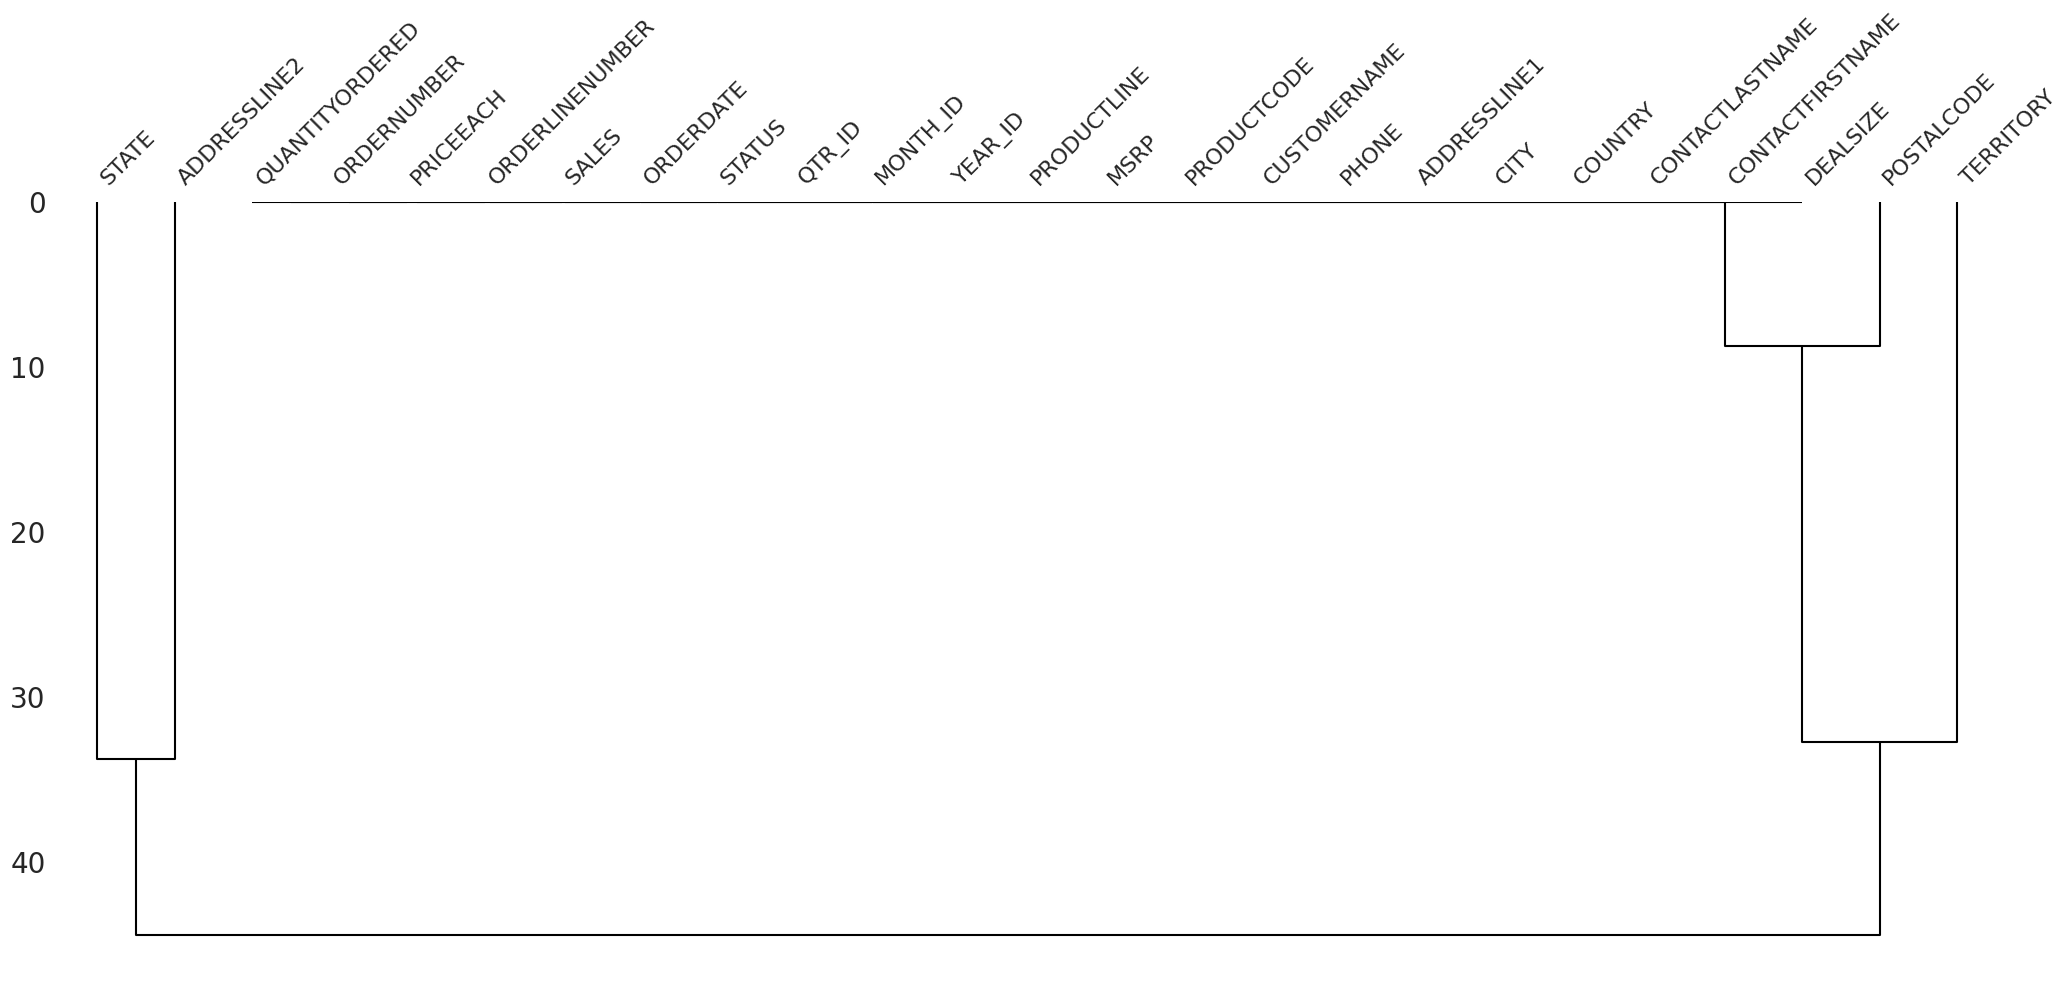

In [301]:
msno.dendrogram(df)
plt.show()

# **Percentage of missing values**

---



# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().sum() * 100 / len(df)

# Display the result
print(missing_percentage)


In [302]:
missing_percentage = df.isnull().sum() * 100 / len(df)

In [303]:
print(missing_percentage)

ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64


In [304]:
# Summary statistics of numerical features
print("Summary Statistics:")
# Customize the appearance using a color palette
styled_summary = df.describe().T.style.background_gradient(cmap="Set1")

# Display the styled summary
styled_summary


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2823.000000,10258.725115,92.085478,10100.000000,10180.000000,10262.000000,10333.500000,10425.000000
QUANTITYORDERED,2823.000000,35.092809,9.741443,6.000000,27.000000,35.000000,43.000000,97.000000
PRICEEACH,2823.000000,83.658544,20.174277,26.880000,68.860000,95.700000,100.000000,100.000000
ORDERLINENUMBER,2823.000000,6.466171,4.225841,1.000000,3.000000,6.000000,9.000000,18.000000
SALES,2823.000000,3553.889072,1841.865106,482.130000,2203.430000,3184.800000,4508.000000,14082.800000
QTR_ID,2823.000000,2.717676,1.203878,1.000000,2.000000,3.000000,4.000000,4.000000
MONTH_ID,2823.000000,7.092455,3.656633,1.000000,4.000000,8.000000,11.000000,12.000000
YEAR_ID,2823.000000,2003.815090,0.699670,2003.000000,2003.000000,2004.000000,2004.000000,2005.000000
MSRP,2823.000000,100.715551,40.187912,33.000000,68.000000,99.000000,124.000000,214.000000


In [305]:
# Calculate the percentage of missing values in each column using apply and lambda
missing_percentage = df.apply(lambda x: x.isnull().mean() * 100)

# Display the result
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
ORDERNUMBER          0.000000
QUANTITYORDERED      0.000000
PRICEEACH            0.000000
ORDERLINENUMBER      0.000000
SALES                0.000000
ORDERDATE            0.000000
STATUS               0.000000
QTR_ID               0.000000
MONTH_ID             0.000000
YEAR_ID              0.000000
PRODUCTLINE          0.000000
MSRP                 0.000000
PRODUCTCODE          0.000000
CUSTOMERNAME         0.000000
PHONE                0.000000
ADDRESSLINE1         0.000000
ADDRESSLINE2        89.302161
CITY                 0.000000
STATE               52.639036
POSTALCODE           2.692171
COUNTRY              0.000000
TERRITORY           38.044633
CONTACTLASTNAME      0.000000
CONTACTFIRSTNAME     0.000000
DEALSIZE             0.000000
dtype: float64


Correlation with Missingness:
                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER              NaN              NaN        NaN              NaN   
QUANTITYORDERED          NaN              NaN        NaN              NaN   
PRICEEACH                NaN              NaN        NaN              NaN   
ORDERLINENUMBER          NaN              NaN        NaN              NaN   
SALES                    NaN              NaN        NaN              NaN   
QTR_ID                   NaN              NaN        NaN              NaN   
MONTH_ID                 NaN              NaN        NaN              NaN   
YEAR_ID                  NaN              NaN        NaN              NaN   
MSRP                     NaN              NaN        NaN              NaN   

                 SALES  ORDERDATE  STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
ORDERNUMBER        NaN        NaN     NaN     NaN       NaN      NaN  ...   
QUANTITYORDERED    NaN        NaN     NaN    

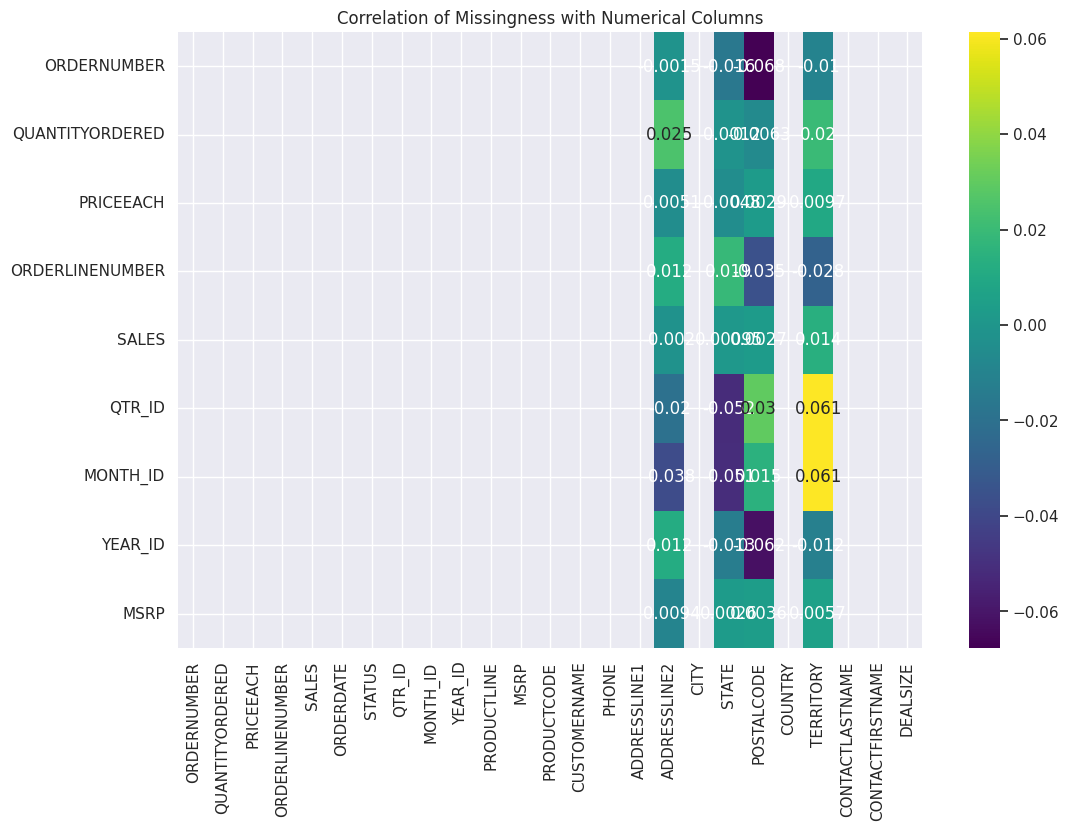

In [306]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame already loaded with your actual data

# Create a DataFrame of missing indicators
missing_indicators = df.isnull().astype(int)

# Filter to select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Compute correlations with missingness
missing_corr = pd.DataFrame(index=numeric_columns)

# Iterate through each numeric column and compute correlation with each missing indicator
for col in numeric_columns:
    for mis_col in missing_indicators.columns:
        missing_corr.loc[col, mis_col] = df[col].corr(missing_indicators[mis_col])

print("Correlation with Missingness:")
print(missing_corr)

# Visualize the correlations with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_corr, annot=True, cmap='viridis')
plt.title('Correlation of Missingness with Numerical Columns')
plt.show()


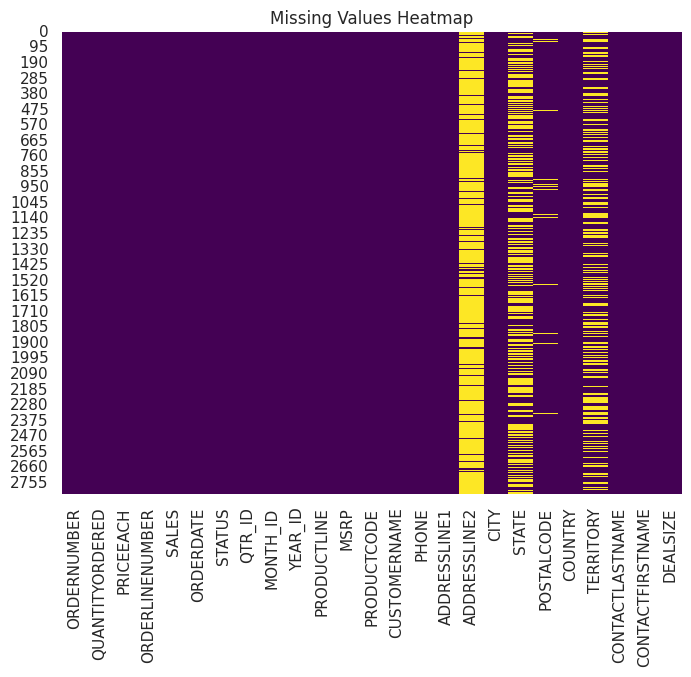

Correlation with Missingness:
ORDERNUMBER        NaN
QUANTITYORDERED    NaN
PRICEEACH          NaN
ORDERLINENUMBER    NaN
SALES              NaN
ORDERDATE          NaN
STATUS             NaN
QTR_ID             NaN
MONTH_ID           NaN
YEAR_ID            NaN
PRODUCTLINE        NaN
MSRP               NaN
PRODUCTCODE        NaN
CUSTOMERNAME       NaN
PHONE              NaN
ADDRESSLINE1       NaN
ADDRESSLINE2       NaN
CITY               NaN
STATE              NaN
POSTALCODE         NaN
COUNTRY            NaN
TERRITORY          NaN
CONTACTLASTNAME    NaN
CONTACTFIRSTNAME   NaN
DEALSIZE           NaN
dtype: float64
Missing values are Missing Not At Random (MNAR).


In [307]:
# Visualize missingness patterns
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Analyze correlations with missingness
missing_corr = df.corrwith(df.isnull().sum())
print("Correlation with Missingness:")
print(missing_corr)

# Determine if missing values are MCAR, MAR, or MNAR
# Example logic (adjust based on your dataset and assumptions)
threshold = 0.5  # Adjust threshold based on your dataset
mcar = all(missing_corr.abs() < threshold)
mar = any(missing_corr.abs() >= threshold)

if mcar:
    print("Missing values are Completely At Random (MCAR).")
elif mar:
    print("Missing values are Missing At Random (MAR).")
else:
    print("Missing values are Missing Not At Random (MNAR).")

# Additional statistical tests (optional)
# Example: Chi-square test or logistic regression to assess dependency

The correlation results you're seeing (NaN for all columns) indicate that there's no measurable linear relationship between the presence of missing values in each column and the other columns in your dataset. This absence of correlation suggests that missing values are likely Missing Not At Random (MNAR).

Understanding MNAR:


---


Missing Not At Random (MNAR) means that the probability of a value being missing depends on unobserved factors or the value itself. In simpler terms, the missingness is related to the missing value itself or some other unmeasured characteristic, rather than observable variables in your dataset.

Interpreting the Analysis:
Correlation Results: The NaN correlation values across all columns indicate no linear relationship between missingness and other variables.

Conclusion: Based on these results, missing values are inferred to be Missing Not At Random (MNAR). This implies that the presence of missing values is likely due to factors not captured by the variables in your dataset.

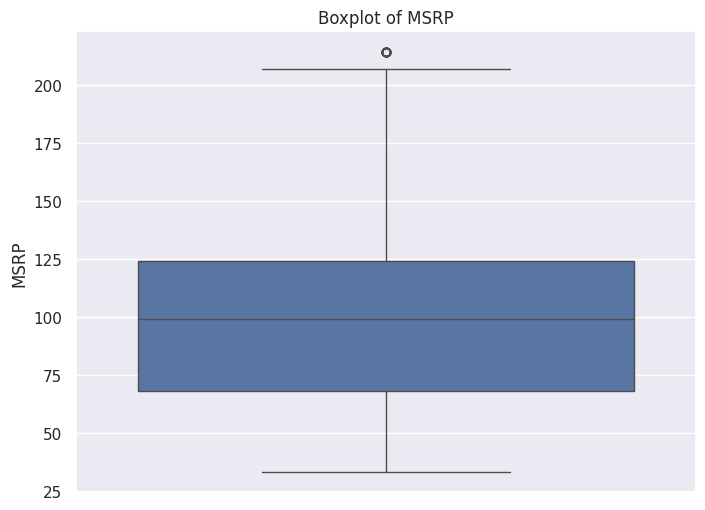

In [308]:
# Boxplot for POSTALCODE (numeric column)
plt.figure(figsize=(8, 6))
sns.boxplot(y='MSRP', data=df)
plt.title('Boxplot of MSRP')
plt.show()

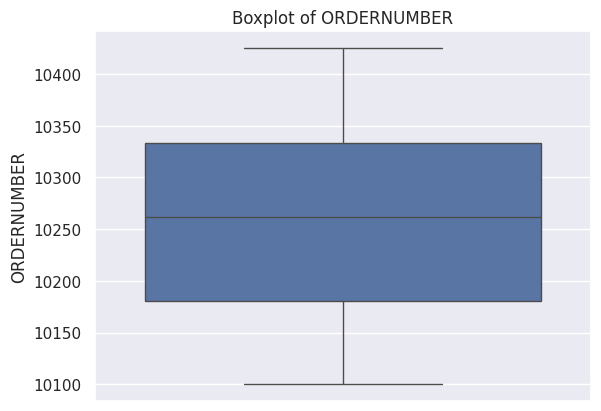

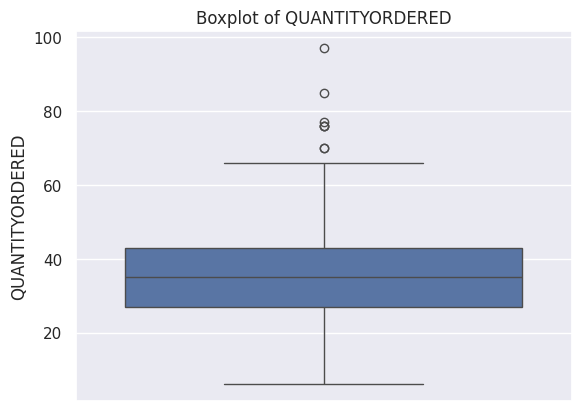

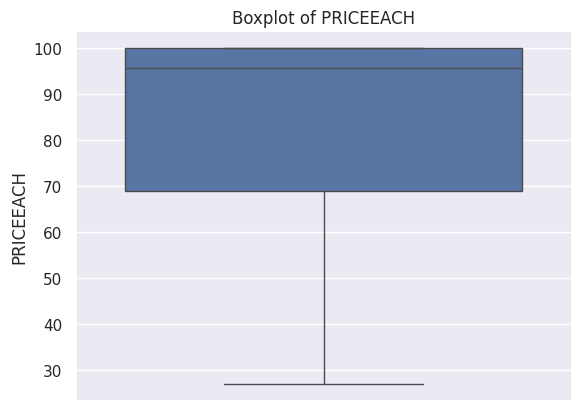

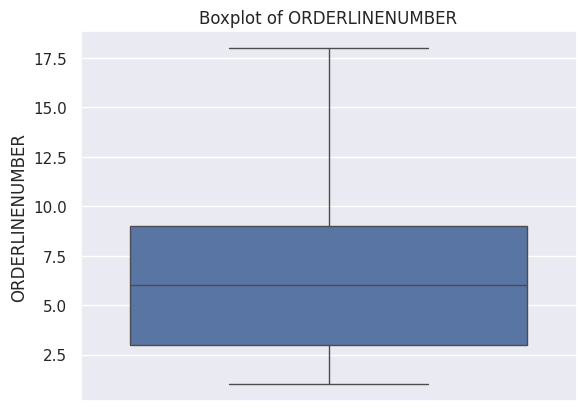

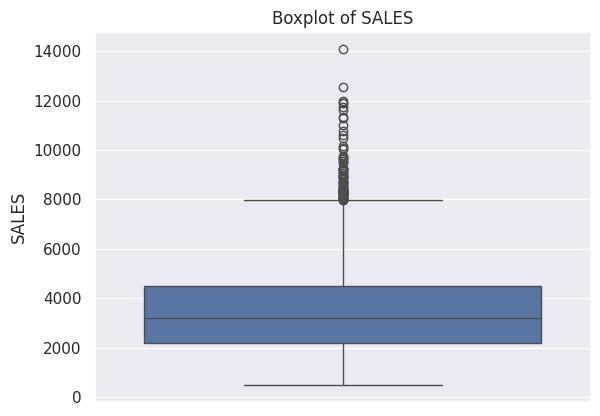

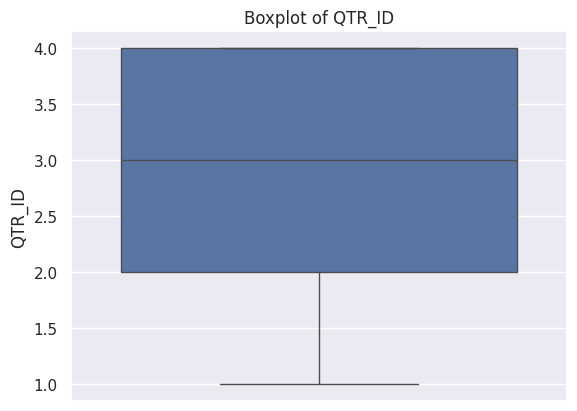

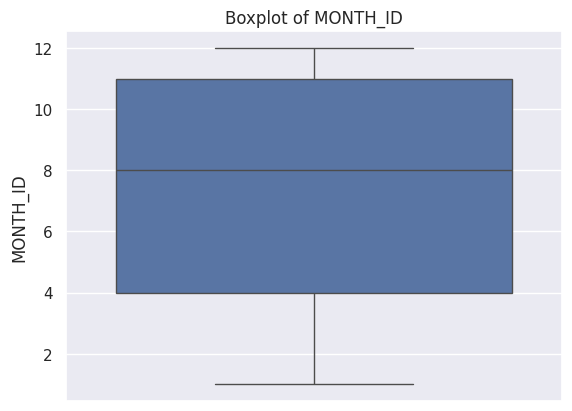

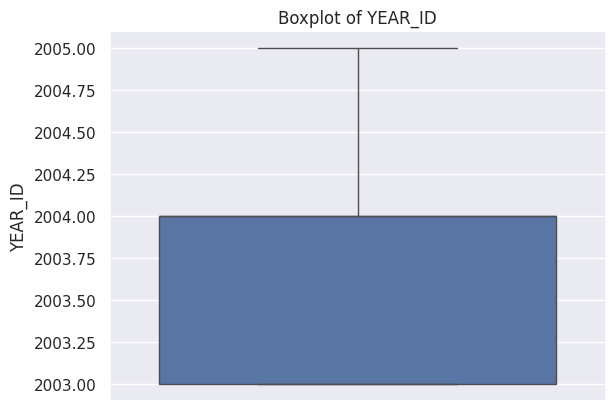

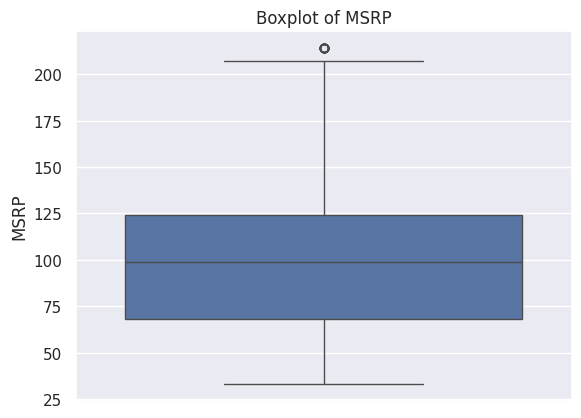

In [309]:
# Filter to select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for each numeric column
for col in numeric_columns:
  boxplot(col)

In [310]:
"""
# Function to plot boxplot for a given column
def boxplot(col):
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
"""

"\n# Function to plot boxplot for a given column\ndef boxplot(col):\n    sns.boxplot(y=df[col])\n    plt.title(f'Boxplot of {col}')\n    plt.show()\n"

In [311]:
"""
def boxplot(col):
  sns.boxplot(df[col])
  plt.show()

for i in list(df.columns):
  boxplot(i)
"""

'\ndef boxplot(col):\n  sns.boxplot(df[col])\n  plt.show()\n\nfor i in list(df.columns):\n  boxplot(i)\n'

# **COUNT PLOTS FOR CATEGORICAL COLUMNS**

---



<ipython-input-312-ff6a0b07d388>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')


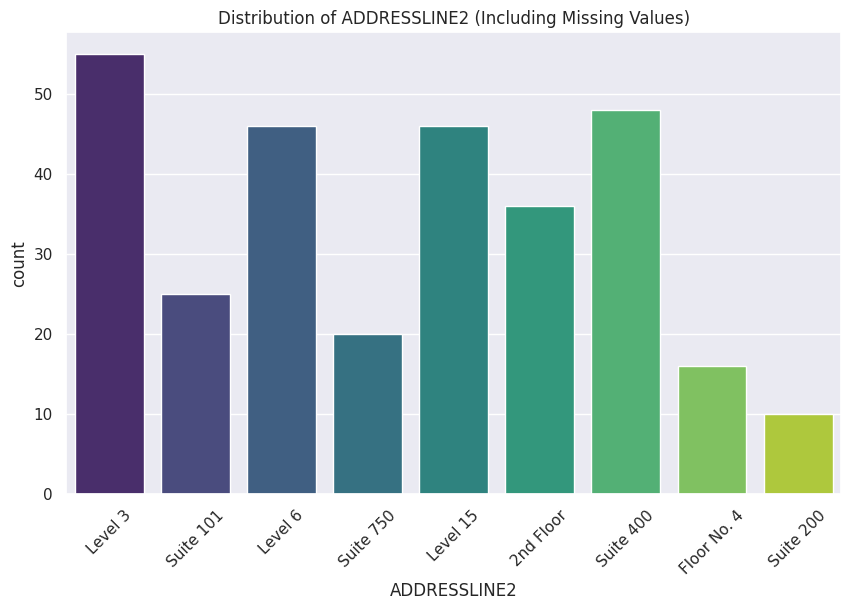

In [312]:
# Visualize the distribution of missing values in categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')
plt.title('Distribution of ADDRESSLINE2 (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()


<ipython-input-313-d7c4ce4ae280>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATE', data=df, palette='viridis')


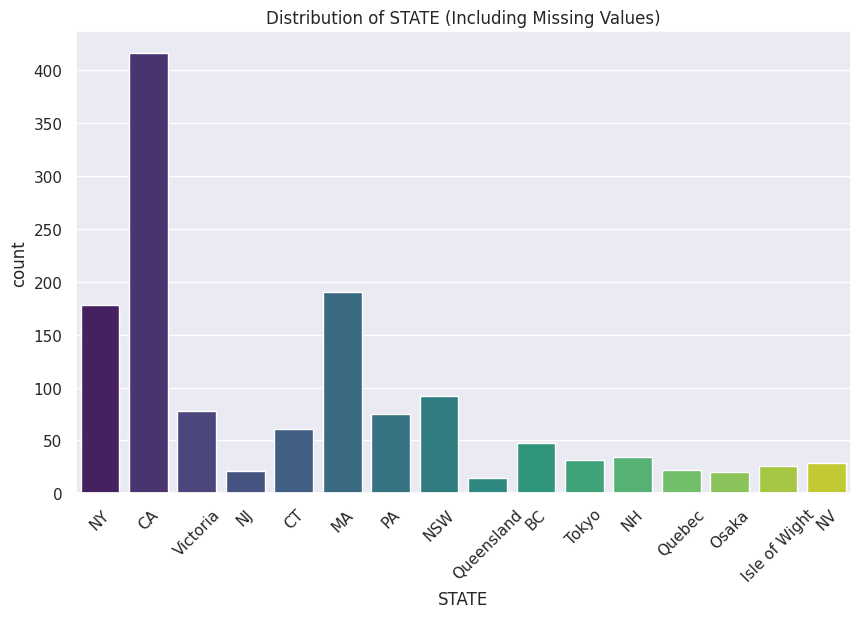

In [313]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STATE', data=df, palette='viridis')
plt.title('Distribution of STATE (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-314-9e2ac86ee8e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TERRITORY', data=df, palette='viridis')


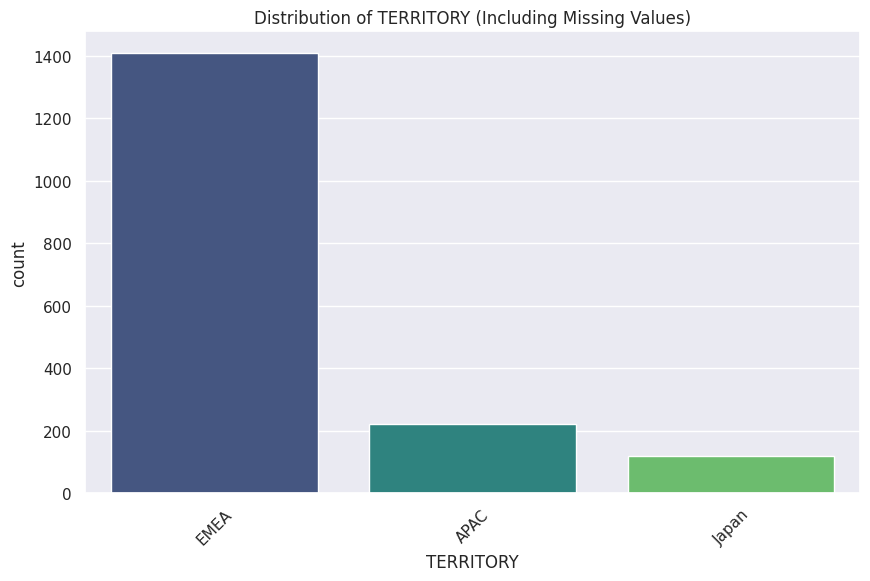

In [314]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TERRITORY', data=df, palette='viridis')
plt.title('Distribution of TERRITORY (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Level 3'),
  Text(1, 0, 'Suite 101'),
  Text(2, 0, 'Level 6'),
  Text(3, 0, 'Suite 750'),
  Text(4, 0, 'Level 15'),
  Text(5, 0, '2nd Floor'),
  Text(6, 0, 'Suite 400'),
  Text(7, 0, 'Floor No. 4'),
  Text(8, 0, 'Suite 200')])

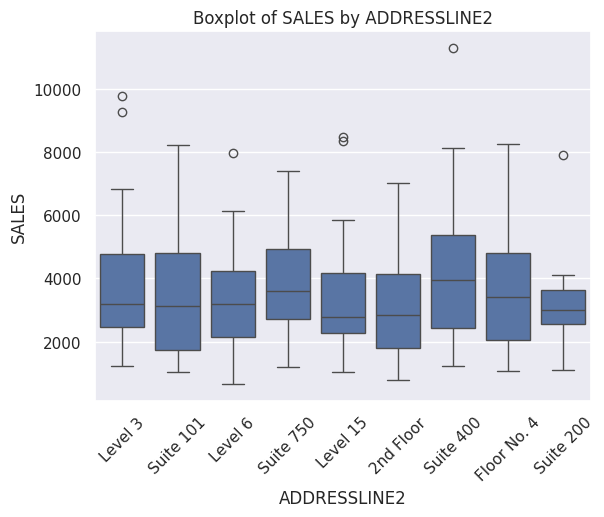

In [315]:
sns.boxplot(x ='ADDRESSLINE2',y = 'SALES',data =df)
plt.title('Boxplot of SALES by ADDRESSLINE2')
plt.xticks(rotation=45)

In [316]:
from datetime import datetime

# Correct the format string to match the data format
df['ORDERDATE'] = df['ORDERDATE'].apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))

# Verify the transformation
print(df['ORDERDATE'].head())


0   2003-02-24
1   2003-05-07
2   2003-07-01
3   2003-08-25
4   2003-10-10
Name: ORDERDATE, dtype: datetime64[ns]


In [317]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


the provided percentage of missing values for the categorical columns in your dataset, you need to decide on the best approach to handle these missing values. Here are some common methods and considerations for handling missing values in categorical data:

1. Fill with a Placeholder

For columns with a very high percentage of missing values, you might fill the missing values with a placeholder like "Unknown" or "Not Provided". This is useful if you want to keep the column in the analysis but indicate that the information is missing.

2. Fill with the Mode

For columns with a moderate percentage of missing values, filling with the mode (most frequent value) can be a reasonable approach.

3. Drop Columns or Rows

For columns with an extremely high percentage of missing values, you might consider dropping the column altogether if it doesn't hold critical information. Similarly, if a row has too many missing values across important columns, you might consider dropping the row.

4. Predictive Imputation

You can use machine learning models to predict missing values based on other columns in the dataset. This is more advanced and requires a more sophisticated approach.

Here's how you can implement some of these methods in Python:




Fill with a Placeholder

For columns like ADDRESSLINE2 which has a very high percentage of missing values:

In [318]:
#df['ADDRESSLINE2'].fillna('Not Provided', inplace=True)


**Fill with the Mode**

---



For columns like STATE and TERRITORY with a moderate percentage of missing values:

In [319]:
#df['STATE'].fillna(df['STATE'].mode()[0], inplace=True)
#df['TERRITORY'].fillna(df['TERRITORY'].mode()[0], inplace=True)


Drop Columns or **Rows

---



If the column ADDRESSLINE2 is not critical, consider dropping it:

In [320]:
#df.drop(columns=['ADDRESSLINE2'], inplace=True)


If you decide to drop rows with missing values in critical columns:

In [321]:
#df.dropna(subset=['STATE', 'POSTALCODE', 'TERRITORY'], inplace=True)


# **Predictive Imputation (Example with Simple Model)**

---



For more advanced imputation, you can use the IterativeImputer from sklearn. Here’s an example for STATE:

In [322]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 'STATE' is the column with missing values
#imputer = IterativeImputer(max_iter=10, random_state=0)
#df['STATE'] = imputer.fit_transform(df[['STATE'] + df.columns.difference(['STATE']).tolist()])

# Note: IterativeImputer is suitable for numeric data, for categorical data, consider using more advanced models like RandomForest, etc.


In [323]:
"""
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
"""

'\nfrom sklearn.experimental import enable_iterative_imputer\nfrom sklearn.impute import IterativeImputer\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.preprocessing import LabelEncoder\n'

In [324]:
# Separate numeric and categorical columns
#numeric_columns = df.select_dtypes(include=['int', 'float']).columns
#categorical_columns = df.select_dtypes(include=['object']).columns


In [325]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [326]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",NaN,Madrid,NaN,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,NaN,Toulouse,NaN,31000,France,EMEA,Roulet,Annette,Small


# **IMPUTATION FOR NUMERICAL AND CATEGORICAL**

---



In [327]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

# **Backward/Forward Fill**

---



Description: Replace missing values using the previous (forward fill) or next (backward fill) value in the column.
Use Case: When the data is time-series or ordered and the values are likely to be similar over short periods.

In [328]:
#df['COLUMN_NAME'].fillna(method='ffill', inplace=True)  # Forward fill
#df['COLUMN_NAME'].fillna(method='bfill', inplace=True)  # Backward fill


Combined Approach

---



You can also use a combined approach where you first apply forward fill and then backward fill to ensure all missing values are filled:

In [329]:
# Combined forward and backward fill for specific columns
columns_to_fill = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']

df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill').fillna(method='bfill')

# Verify the result
print(df[columns_to_fill].isnull().sum())


ADDRESSLINE2    0
STATE           0
POSTALCODE      0
TERRITORY       0
dtype: int64


In [330]:
# Backward fill for specific columns
#columns_to_fill = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY']

#df[columns_to_fill] = df[columns_to_fill].fillna(method='bfill')

# Verify the result
#print(df[columns_to_fill].isnull().sum())


In [331]:
"""
from sklearn.impute import KNNImputer
# Step 2: Impute Missing Values using KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
"""

'\nfrom sklearn.impute import KNNImputer\n# Step 2: Impute Missing Values using KNNImputer\nimputer = KNNImputer(n_neighbors=5)\ndf_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)\n'

In [332]:
"""
# Define the RandomForestClassifier for the imputer
rf_imputer = IterativeImputer(estimator=RandomForestClassifier(), max_iter=10, random_state=0)

# Apply imputation to numeric columns only
#df_imputed = df.copy()  # Create a copy to preserve original
#df_imputed[numeric_columns] = rf_imputer.fit_transform(df[numeric_columns])
df_imputed[categorical_columns] = rf_imputer.fit_transform(df[categorical_columns].astype(int))

# Convert the imputed array back to a DataFrame
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)
"""

'\n# Define the RandomForestClassifier for the imputer\nrf_imputer = IterativeImputer(estimator=RandomForestClassifier(), max_iter=10, random_state=0)\n\n# Apply imputation to numeric columns only\n#df_imputed = df.copy()  # Create a copy to preserve original\n#df_imputed[numeric_columns] = rf_imputer.fit_transform(df[numeric_columns])\ndf_imputed[categorical_columns] = rf_imputer.fit_transform(df[categorical_columns].astype(int))\n\n# Convert the imputed array back to a DataFrame\ndf_imputed = pd.DataFrame(df_imputed, columns=df.columns)\n'

In [333]:
df.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

NOW THERE ARE NO MISSSING VALUES.
NOW we will encode using label encoder.

In [334]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,...,897 Long Airport Avenue,Level 3,NYC,NY,10022,USA,EMEA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,...,59 rue de l'Abbaye,Level 3,Reims,NY,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,Level 3,Paris,NY,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,...,78934 Hillside Dr.,Level 3,Pasadena,CA,90003,USA,EMEA,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,...,7734 Strong St.,Level 3,San Francisco,CA,90003,USA,EMEA,Brown,Julie,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10350,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,...,"C/ Moralzarzal, 86",Suite 750,Madrid,NY,28034,Spain,EMEA,Freyre,Diego,Small
2819,10373,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,...,Torikatu 38,Suite 750,Oulu,NY,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
2820,10386,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,...,"C/ Moralzarzal, 86",Suite 750,Madrid,NY,28034,Spain,EMEA,Freyre,Diego,Medium
2821,10397,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,...,1 rue Alsace-Lorraine,Suite 750,Toulouse,NY,31000,France,EMEA,Roulet,Annette,Small


In [335]:
df.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

<ipython-input-337-67ab50382419>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')


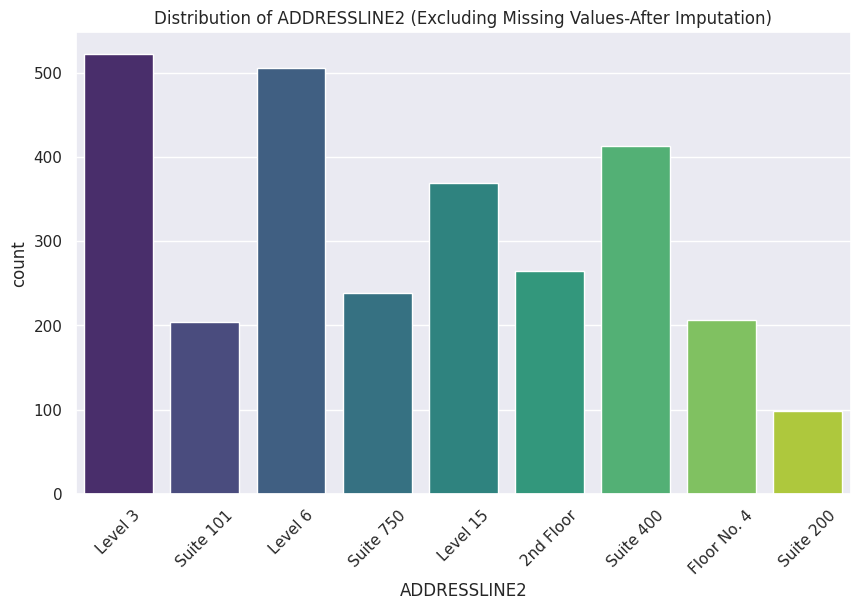

In [337]:
# Visualize the distribution of missing values in categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')
plt.title('Distribution of ADDRESSLINE2 (Excluding Missing Values-After Imputation)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-340-64479adcc82d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='STATE', data=df, palette='viridis')


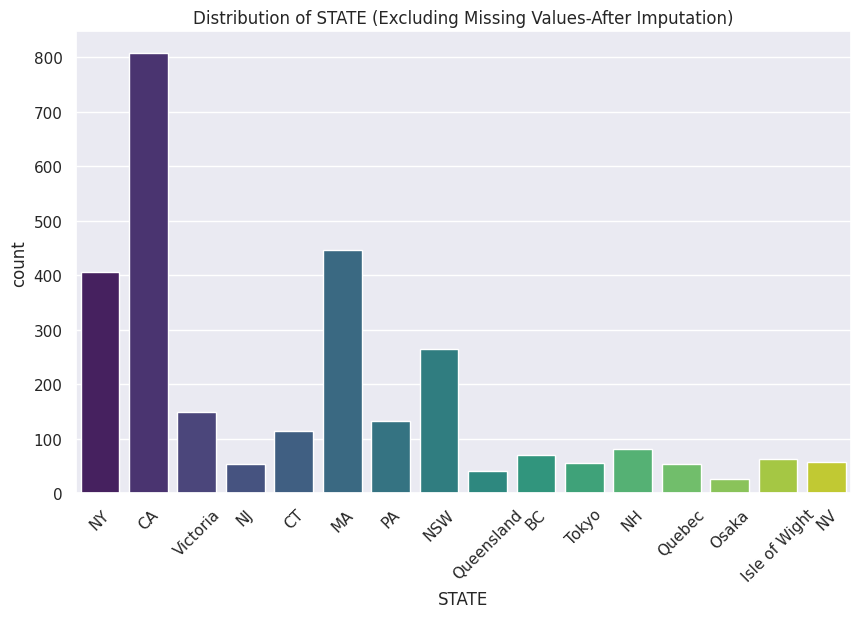

In [340]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STATE', data=df, palette='viridis')
plt.title('Distribution of STATE (Excluding Missing Values-After Imputation)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-339-2e7debfb2194>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TERRITORY', data=df, palette='viridis')


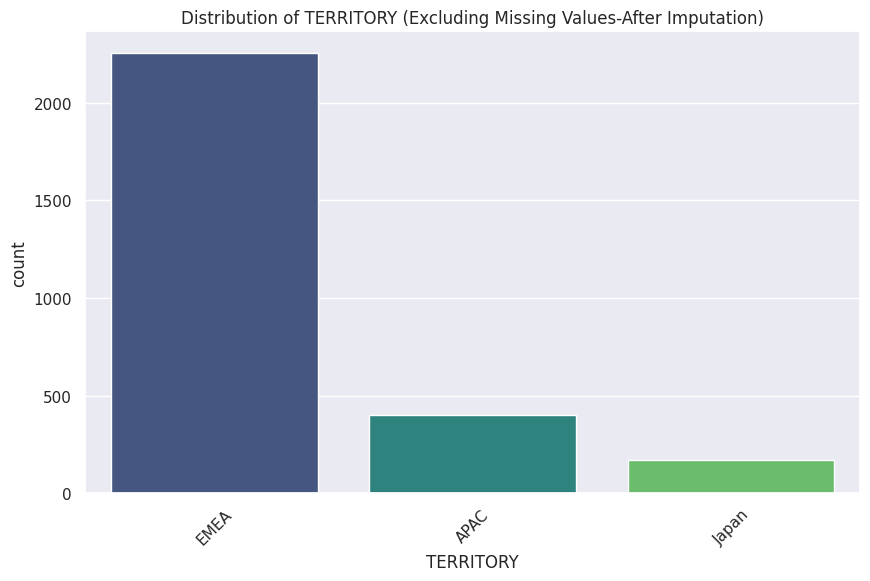

In [339]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TERRITORY', data=df, palette='viridis')
plt.title('Distribution of TERRITORY (Excluding Missing Values-After Imputation)')
plt.xticks(rotation=45)
plt.show()

<ipython-input-347-9423bbce85cb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='POSTALCODE', data=df, palette='viridis')


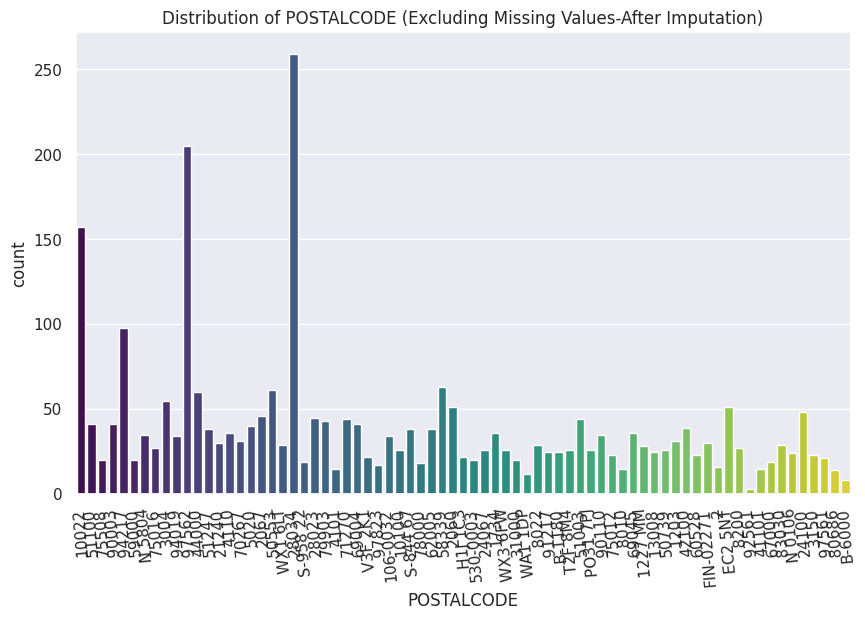

In [347]:
plt.figure(figsize=(10, 6))
sns.countplot(x='POSTALCODE', data=df, palette='viridis')
plt.title('Distribution of POSTALCODE (Excluding Missing Values-After Imputation)')
plt.xticks(rotation=95)
plt.show()

In [348]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Display the encoded DataFrame
print("Encoded DataFrame:")
print(df)

Encoded DataFrame:
      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  SALES  \
0               7               18        944               10   1142   
1              21               22        697               13   1057   
2              33               29        929               10   1766   
3              43               33        736               14   1689   
4              56               37          0                5   2251   
...           ...              ...        ...              ...    ...   
2818          238                8          0                6    694   
2819          259               17          0                0   1817   
2820          272               31          0               12   2309   
2821          282               22        356                0    598   
2822          296               35        419               17   1271   

      ORDERDATE  STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  ADDRESSLINE1  \
0             7       5       0

In [349]:
df

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,7,18,944,10,1142,7,5,0,4,0,...,57,3,42,9,0,18,1,76,36,2
1,21,22,697,13,1057,21,5,1,7,0,...,40,3,56,9,27,6,1,28,54,2
2,33,29,929,10,1766,31,5,2,9,0,...,21,3,52,9,41,6,1,17,11,1
3,43,33,736,14,1689,41,5,2,10,0,...,54,3,53,1,49,18,1,75,31,1
4,56,37,0,5,2251,55,5,3,1,0,...,51,3,59,1,49,18,1,8,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,238,8,0,6,694,194,5,3,3,1,...,65,8,34,9,14,14,1,25,13,2
2819,259,17,0,0,1817,211,5,0,0,2,...,87,8,51,9,50,5,1,39,56,1
2820,272,31,0,12,2309,222,4,0,5,2,...,65,8,34,9,14,14,1,25,13,1
2821,282,22,356,0,598,231,5,0,5,2,...,0,8,68,9,16,6,1,59,5,2


In [350]:
df.shape

(2823, 25)

In [352]:
df.dtypes

ORDERNUMBER         int64
QUANTITYORDERED     int64
PRICEEACH           int64
ORDERLINENUMBER     int64
SALES               int64
ORDERDATE           int64
STATUS              int64
QTR_ID              int64
MONTH_ID            int64
YEAR_ID             int64
PRODUCTLINE         int64
MSRP                int64
PRODUCTCODE         int64
CUSTOMERNAME        int64
PHONE               int64
ADDRESSLINE1        int64
ADDRESSLINE2        int64
CITY                int64
STATE               int64
POSTALCODE          int64
COUNTRY             int64
TERRITORY           int64
CONTACTLASTNAME     int64
CONTACTFIRSTNAME    int64
DEALSIZE            int64
dtype: object

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ORDERNUMBER       2823 non-null   int64
 1   QUANTITYORDERED   2823 non-null   int64
 2   PRICEEACH         2823 non-null   int64
 3   ORDERLINENUMBER   2823 non-null   int64
 4   SALES             2823 non-null   int64
 5   ORDERDATE         2823 non-null   int64
 6   STATUS            2823 non-null   int64
 7   QTR_ID            2823 non-null   int64
 8   MONTH_ID          2823 non-null   int64
 9   YEAR_ID           2823 non-null   int64
 10  PRODUCTLINE       2823 non-null   int64
 11  MSRP              2823 non-null   int64
 12  PRODUCTCODE       2823 non-null   int64
 13  CUSTOMERNAME      2823 non-null   int64
 14  PHONE             2823 non-null   int64
 15  ADDRESSLINE1      2823 non-null   int64
 16  ADDRESSLINE2      2823 non-null   int64
 17  CITY              2823 non-null  

In [ ]:
"""
# Decode the categorical variables back to their original form
for col in categorical_columns:
    le = label_encoders[col]
    df_imputed[col] = le.inverse_transform(df_imputed[col].astype(int))

# Display the final DataFrame with imputed values
print("Final DataFrame with Imputed Values:")
print(df_imputed)
"""

<ipython-input-227-ff6a0b07d388>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')


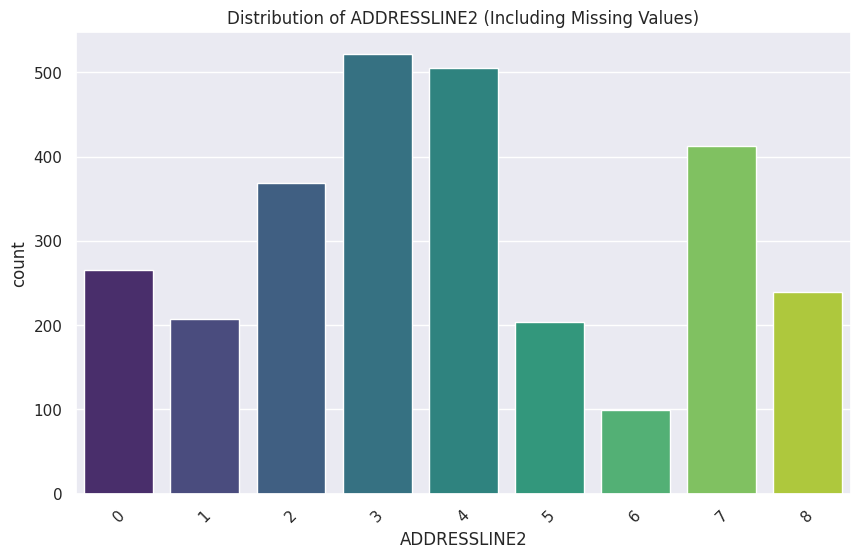

In [227]:
# Visualize the distribution of missing values in categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='ADDRESSLINE2', data=df, palette='viridis')
plt.title('Distribution of ADDRESSLINE2 (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='STATE', data=df, palette='viridis')
plt.title('Distribution of STATE (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TERRITORY', data=df, palette='viridis')
plt.title('Distribution of TERRITORY (Including Missing Values)')
plt.xticks(rotation=45)
plt.show()

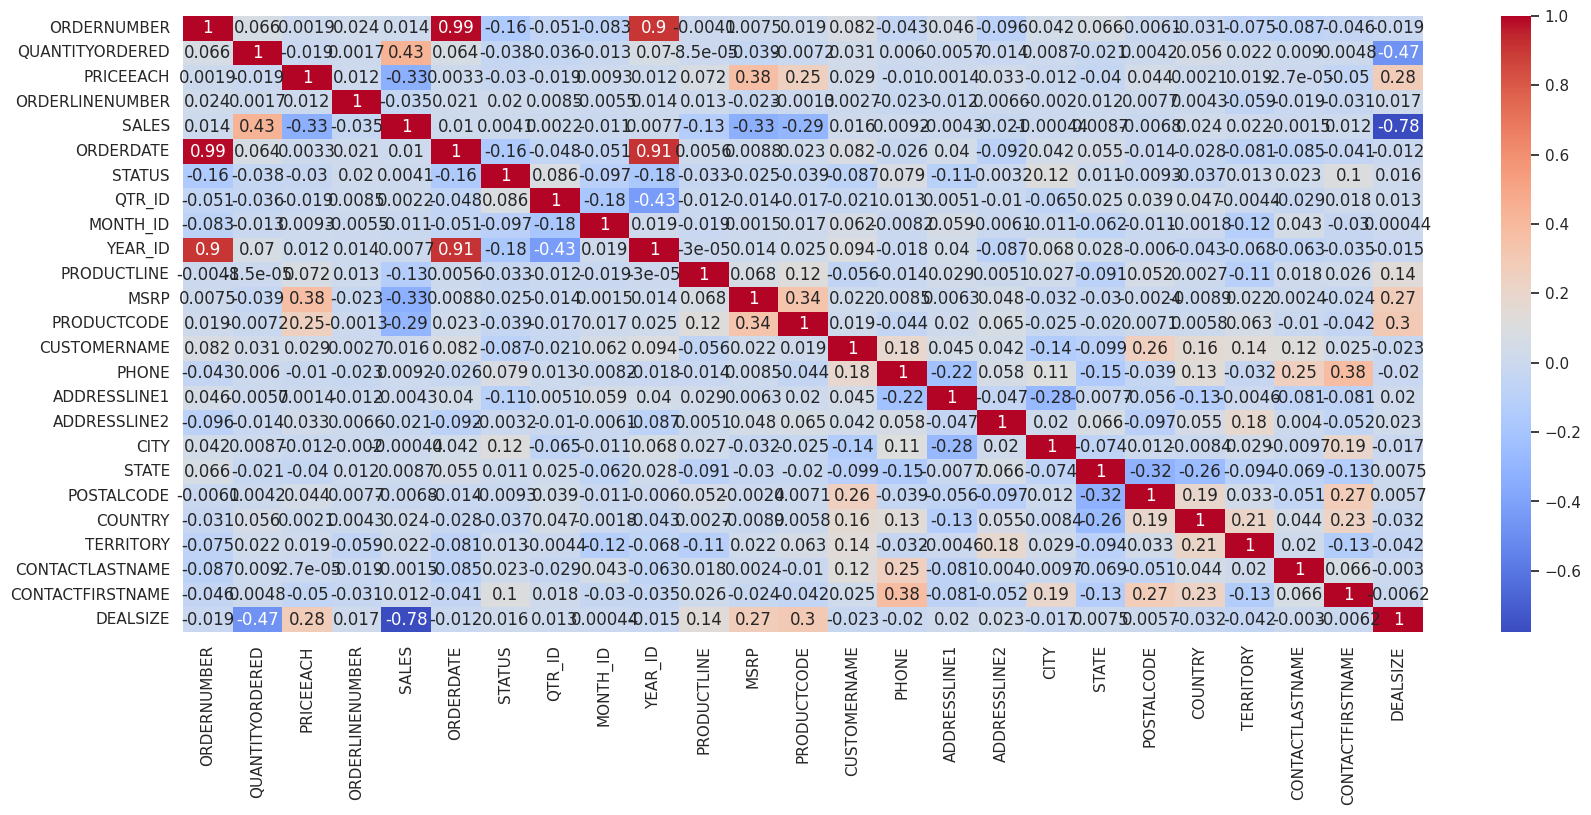

In [354]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Here we can see there is high correlation between ordernumber and order date.And slight correlation between YEAR_ID and Order date negative correlation between SALES and DEALSIZE.

# **MODEL BUILDING**

---

